In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [3]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
data_1 = data.copy()
# data_1.groupby(['MaritalStatusID'])
# data_1.drop(columns=['Employee_Name', 'EmpID', 'MarriedID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'GenderID', 'MaritalStatusID', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatu'])
data_1 = data_1[['Salary', 'Sex', 'MaritalDesc']]
data_1_grouped = data_1.groupby(['MaritalDesc', 'Sex'])
min_salary = data_1.groupby(['MaritalDesc', 'Sex']).min()
median_salary = data_1.groupby(['MaritalDesc', 'Sex']).mean()
data_1_desc = data_1_grouped.describe()
data_1_desc.columns = data_1_desc.columns.droplevel()
result = data_1_desc.drop(columns=['count', 'std', '25%', '75%'])
result = result.rename(columns={"min":"min_salary", "mean":"mean_salary", "50%":"median_salary", "max":"max_salary"})
result

mean_salary  min_salary  median_salary  max_salary
MaritalDesc Sex                                                     
Divorced    F    57345.500000     45069.0        59393.0     68182.0
            M    72520.857143     45115.0        63738.5    148999.0
Married     F    69638.986111     45433.0        62662.0    250000.0
            M    70089.038462     46120.0        63370.5    157000.0
Separated   F    60658.888889     52984.0        60627.0     66149.0
            M    69760.666667     64397.0        70468.0     74417.0
Single      F    68988.266667     45395.0        62068.0    220450.0
            M    71340.048387     46428.0        63055.5    178000.0
Widowed     F    69719.750000     45046.0        63303.5    107226.0
            M    60670.500000     52788.0        61359.0     67176.0

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [4]:
data_2 = data.copy()
data_2 = data_2.groupby('TermReason').count().sort_values(by='EmpID', ascending=False).head(5)
data_2 = data_2[['EmpID']]
data_2.rename(columns={'EmpID':'total_termination'})

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [5]:
data_3 = data.copy()
data_3 = data_3[data_3['PerformanceScore'] == 'Exceeds']
data_3 = data_3.groupby('RecruitmentSource').count().sort_values(by='Employee_Name', ascending=False)
data_3 = data_3[['Employee_Name']]
data_3.rename(columns={'Employee_Name':'total_recruit'})

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [6]:
data_4 = data.copy()
# data_4 = data_4[['Department', 'ManagerName']]
# data_4.drop_duplicates(subset=['ManagerName']).groupby('Department').count()
data_4 = data_4.groupby('Department').nunique()
data_4 = data_4[['ManagerName']]
data_4

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [70]:
data_5 = data.copy()
data_5 = data_5[['Sex', 'Termd', 'EmpID']]
data_5['%'] = 100 * data_5['EmpID'] / data_5.groupby('Sex')['EmpID'].transform('sum')
data_5 = data_5.groupby(['Sex', 'Termd']).sum().drop(columns=['EmpID'])
data_5

%
Sex Termd           
F   0      65.842921
    1      34.157079
M   0      67.404344
    1      32.595656

# Create an EDA and Data Visualization Question

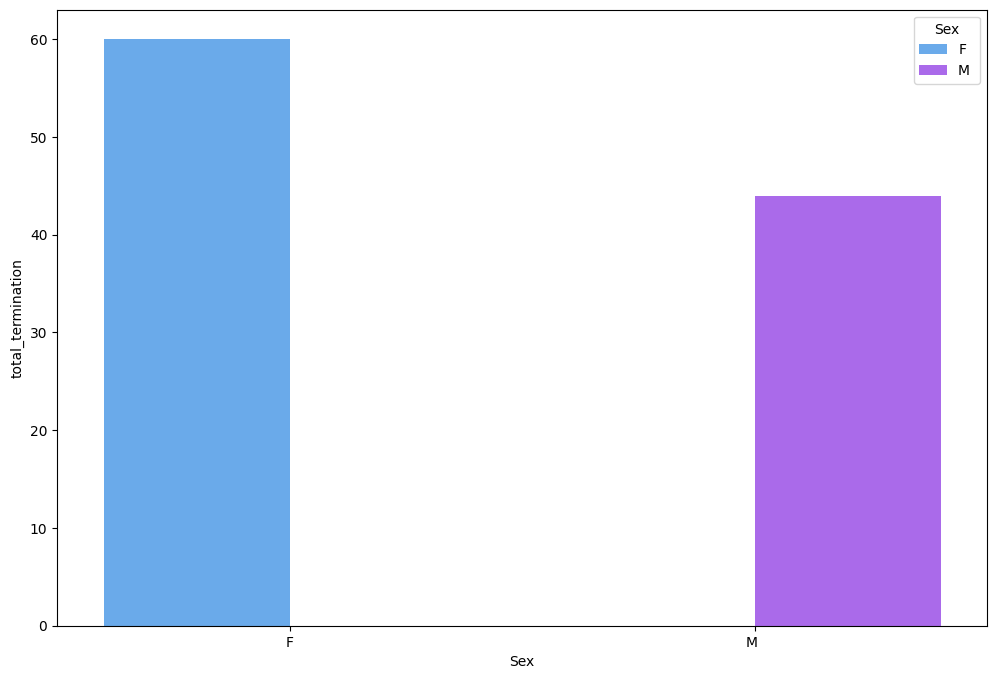

In [8]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

<Axes: xlabel='Salary', ylabel='EngagementSurvey'>

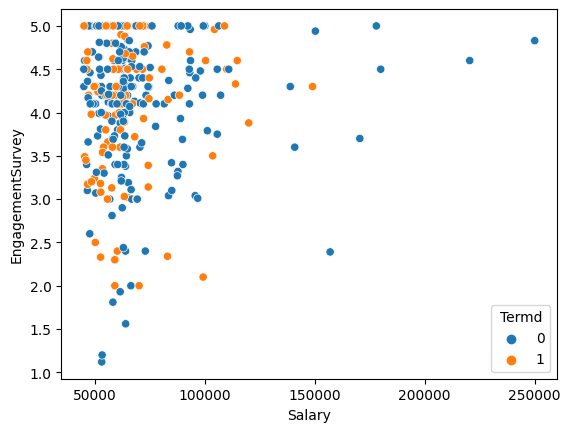

In [9]:
sns.scatterplot(data, y="EngagementSurvey", x="Salary", hue="Termd")

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

<Axes: xlabel='total_termination', ylabel='Department'>

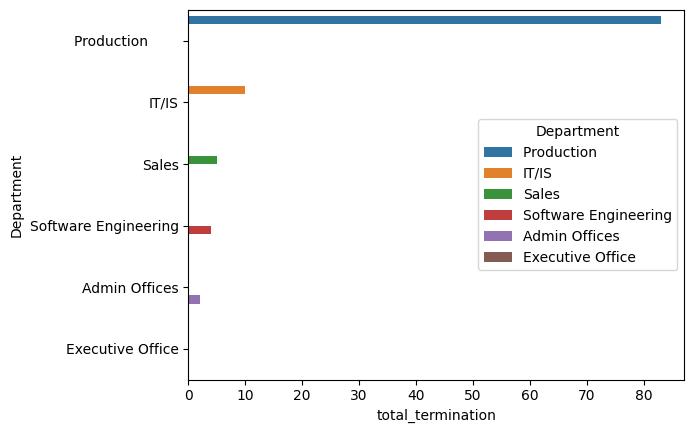

In [10]:
term_2 = data.groupby(by=['Department']).agg(total_termination=('Termd','sum')).reset_index()
sns.barplot(x='total_termination', y='Department', hue='Department', data=term_2.sort_values('total_termination', ascending=False))

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

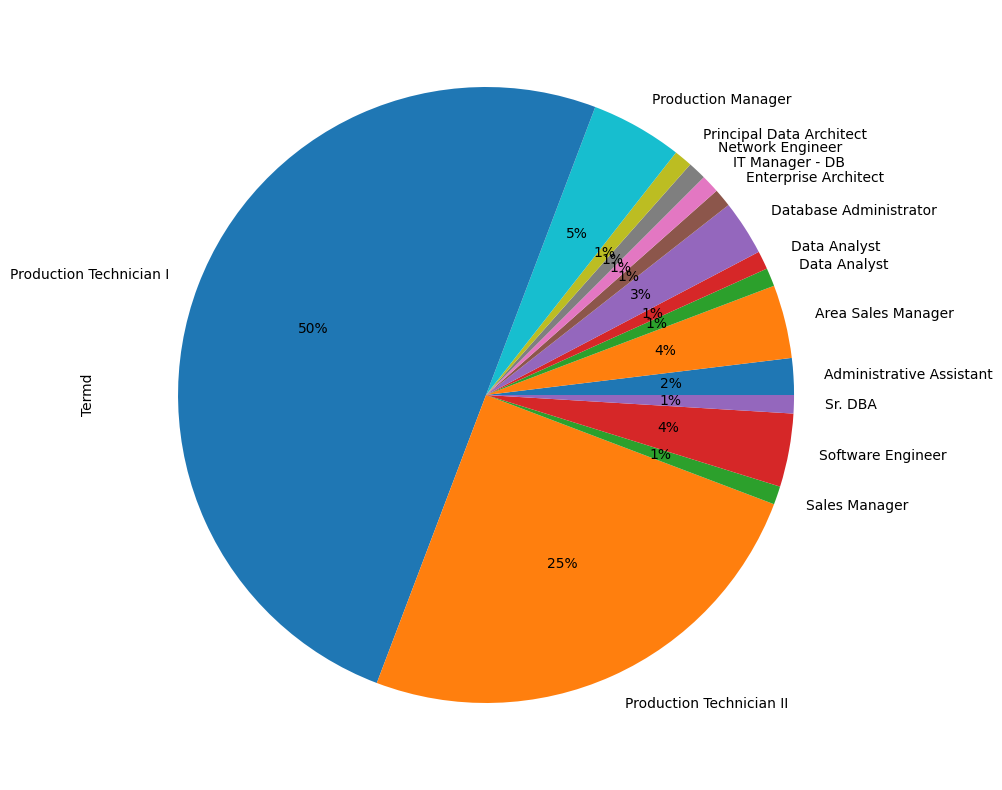

In [11]:
import matplotlib.pyplot as plt
data_8 = data.copy()
data_8 = data_8[data_8['Termd'] == 1]
data_8.groupby('Position').count().plot.pie(y='Termd', figsize=(10, 10), autopct='%1.0f%%').get_legend().remove()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

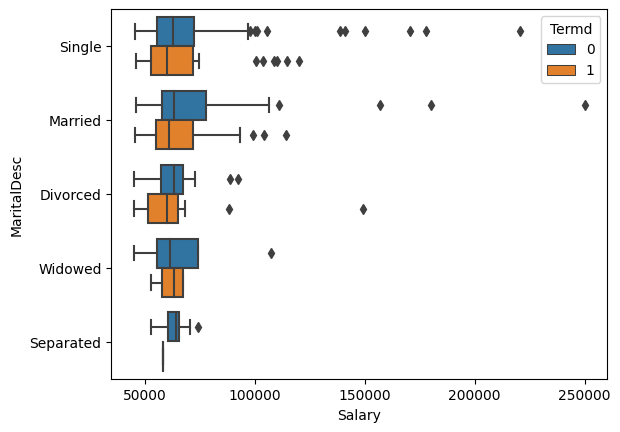

In [12]:
#code here
data_9 = data.copy()
data_9 = data_9[['Salary', 'Termd', 'MaritalDesc']]
sns.boxplot(data=data_9, x='Salary', y='MaritalDesc', hue='Termd')

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


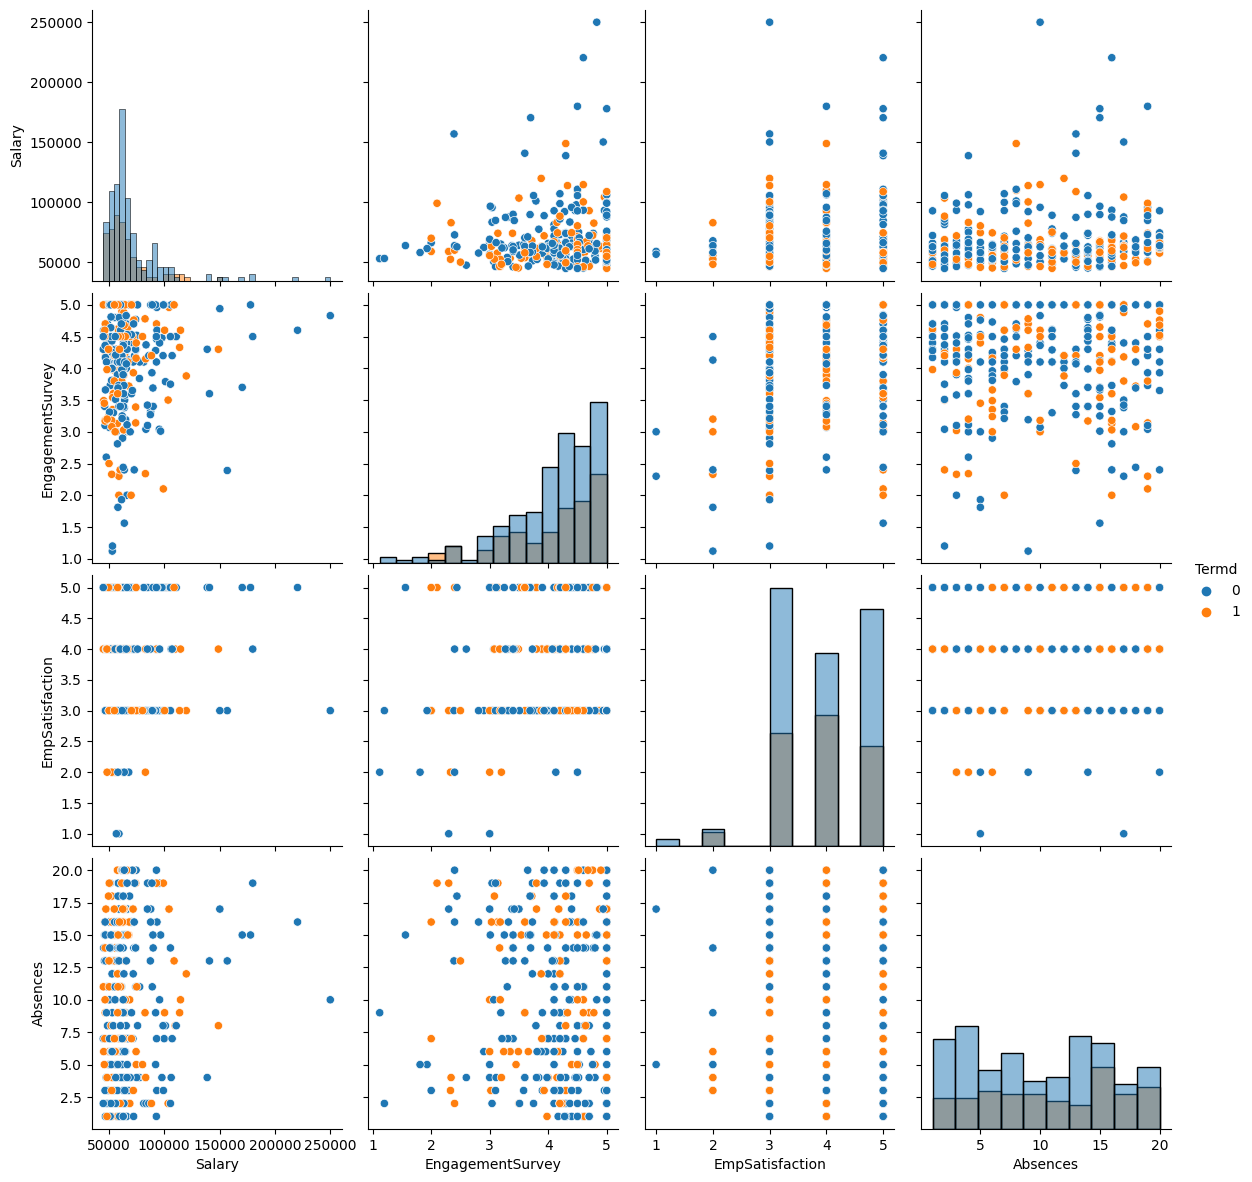

In [13]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [14]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
data_11 = data.copy()
data_11 = data_11[['DOB']]
data = []
for index, row in data_11.iterrows():
    dob = row['DOB'].split("/")
    str_ = ""
    if int(dob[2]) > 22:
        str_ = str_ + "19" + dob[2]
    else:
        str_ = str_ + "20" + dob[2]
    str_ = str_ + "-" + dob[0] + "-" + dob[1]
    data.append(str_)

data_11['DOB_date'] = data
age = []
for index, row in data_11.iterrows():
    dob = row['DOB_date'].split("-")
    data_age = 2022 - int(dob[0])
    age.append(data_age)
data_11['Age'] = age
data_11

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [17]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler
data_12 = data.copy()
data_12 = data_12[['Salary']]
scaler = MinMaxScaler()
scaler.fit(data_12)
normalized = scaler.transform(data_12)
data_12['Salary_minmax'] = normalized
data_12

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [18]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
data_13 = data.copy()
for col in data_13.columns:
  if data_13[col].dtype == "object":
    data_13[col] = data_13[col].astype('category')
data_13.dtypes

Employee_Name                 category
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [ ]:
#Setelah diubah category

In [19]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder
data_14 = data.copy()
data_14 = data_14[['RecruitmentSource']]
le = LabelEncoder()
le.fit(data_14)
encoded = le.transform(data_14)
data_14['RecruitmentSource_labeled'] = encoded
data_14

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,RecruitmentSource,RecruitmentSource_labeled
0,LinkedIn,5
1,Indeed,4
2,LinkedIn,5
3,Indeed,4
4,Google Search,3
...,...,...
306,LinkedIn,5
307,Google Search,3
308,Employee Referral,2
309,Employee Referral,2


In [20]:
#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
data_15 = data.copy()
data_15 = data_15[['PerformanceScore']]
le.fit(data_15)
encoded = le.transform(data_15)
data_15['PerformanceScore_labeled'] = encoded
data_15

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,PerformanceScore,PerformanceScore_labeled
0,Exceeds,0
1,Fully Meets,1
2,Fully Meets,1
3,Fully Meets,1
4,Fully Meets,1
...,...,...
306,Fully Meets,1
307,PIP,3
308,Exceeds,0
309,Fully Meets,1


In [21]:
processed_df = data.copy()
processed_df = processed_df[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PositionID', 'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey']]
processed_df['Age'] = data_11['Age']
processed_df['RecruitmentSource'] = data_14['RecruitmentSource_labeled']
processed_df['PerformanceScore'] = data_15['PerformanceScore_labeled']
processed_df['Salary_minmax'] = data_12['Salary_minmax']
processed_df

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey,Age,RecruitmentSource,PerformanceScore,Salary_minmax
0,0,0,1,5,4,19,1,0,5,4.60,39,5,0,0.085190
1,1,1,1,3,3,27,17,6,3,4.96,47,4,1,0.289777
2,1,1,0,5,3,20,3,0,3,3.02,34,5,1,0.097139
3,1,1,0,5,3,19,15,0,5,4.84,34,4,1,0.097315
4,0,2,0,5,3,19,2,0,4,5.00,33,3,1,0.028197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,0,1,5,3,20,13,0,4,4.07,37,5,1,0.101716
307,0,0,0,5,1,19,4,0,2,3.20,40,3,3,0.016916
308,0,0,0,3,4,6,16,6,5,4.60,43,2,0,0.855821
309,0,0,0,3,3,9,11,5,3,5.00,43,2,1,0.215883


In [22]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
target = data[['Termd']]
#Independent Variable (feature)
feature = processed_df

In [23]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [30]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
result = dt.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, result)))
print("Precision: {}".format(precision_score(y_test, result)))
print("Recall: {}".format(recall_score(y_test, result)))

Accuracy: 0.6190476190476191
Precision: 0.4583333333333333
Recall: 0.5


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>
The lowest ratio would be website, but website only havea total of 13 worker coming from there. So if you want to pick the lowest ratio whilst maintaining a rational amount of recruitee, LinkedIn and Indeed would be the best

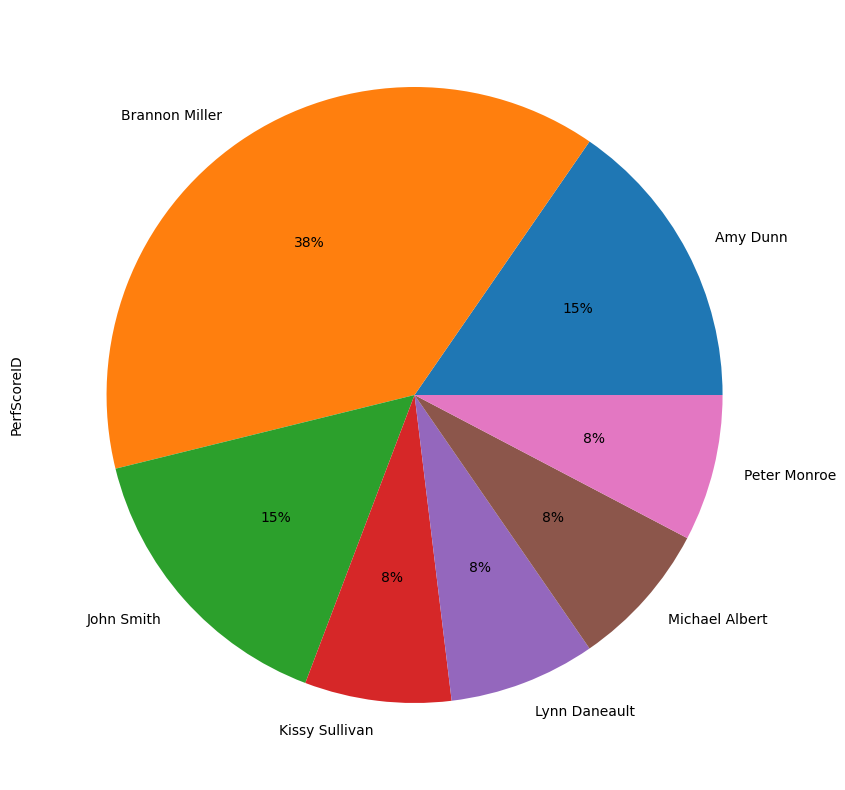

In [42]:
#19
#codde here
data_19 = data[data['PerfScoreID'] == 1]
data_19.groupby('ManagerName').count().plot.pie(y='PerfScoreID', figsize=(10, 10), autopct='%1.0f%%').get_legend().remove()

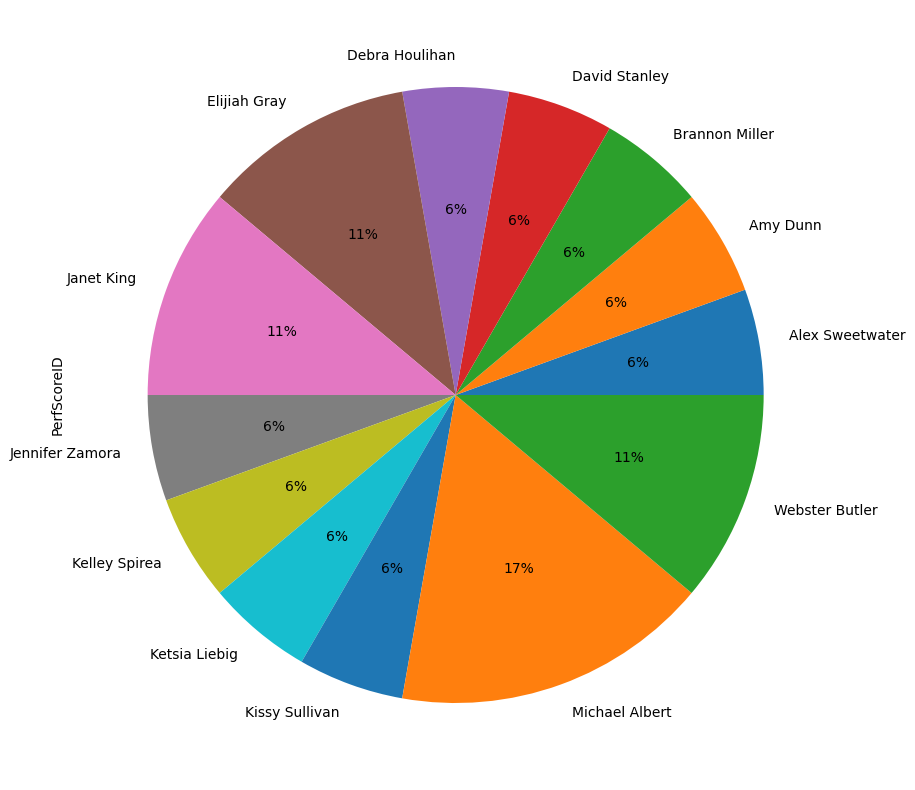

In [43]:
data_19 = data[data['PerfScoreID'] == 2]
data_19.groupby('ManagerName').count().plot.pie(y='PerfScoreID', figsize=(10, 10), autopct='%1.0f%%').get_legend().remove()

In [62]:
#20
data_20 = data[['RecruitmentSource', 'Termd', 'EmpID']]
data_20['%'] = 100 * data_20['EmpID'] / data_20.groupby('RecruitmentSource')['EmpID'].transform('sum')
data_20.groupby(['RecruitmentSource', 'Termd']).sum().drop(columns=['EmpID'])

<ipython-input-62-fcd201ade50c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20['%'] = 100 * data_20['EmpID'] / data_20.groupby('RecruitmentSource')['EmpID'].transform('sum')


%
RecruitmentSource       Termd            
CareerBuilder           0       52.294643
                        1       47.705357
Diversity Job Fair      0       44.755581
                        1       55.244419
Employee Referral       0       83.774533
                        1       16.225467
Google Search           0       38.678933
                        1       61.321067
Indeed                  0       75.809185
                        1       24.190815
LinkedIn                0       76.349020
                        1       23.650980
On-line Web application 1      100.000000
Other                   0       49.538038
                        1       50.461962
Website                 0       92.363987
                        1        7.636013

In [66]:
data_21 = data[['RecruitmentSource', 'Termd', 'EmpID']]
data_21.groupby(['RecruitmentSource', 'Termd']).count()


EmpID
RecruitmentSource       Termd       
CareerBuilder           0         12
                        1         11
Diversity Job Fair      0         13
                        1         16
Employee Referral       0         26
                        1          5
Google Search           0         19
                        1         30
Indeed                  0         66
                        1         21
LinkedIn                0         58
                        1         18
On-line Web application 1          1
Other                   0          1
                        1          1
Website                 0         12
                        1          1